<a href="https://colab.research.google.com/github/pyhtonman0101/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Retail Sales Prediction - Mohd Zahid Ansari/Data/Rossmann Stores Data.csv', parse_dates=['Date'])
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Retail Sales Prediction - Mohd Zahid Ansari/Data/store.csv')

### Dataset First View

In [4]:
# Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
sales_df.shape

(1017209, 9)

In [8]:
store_df.shape

(1115, 10)

### Dataset Information

In [9]:
# Dataset Info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print(f'Duplicate values in the Sales_df dataset: {len(sales_df[sales_df.duplicated()])}')
print(f'Duplicate values in the Store_df dataset: {len(store_df[store_df.duplicated()])}')

Duplicate values in the Sales_df dataset: 0
Duplicate values in the Store_df dataset: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There is no missing values in the sales_df dataframe.

In [13]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are missing values in some features. In Promo2SinceWeek, Promo2SinceYear and PromoInterval there are aproximately 49% missing values and in CompetitionOpenSinceMonth and CompetitionOpenSinceYear there are approximately 32% missing values.

**Should we drop the column with missing values more than 30%?**

Let's know more about these features:

1.   **compititionDistance:** This is the distance in meters to the nearest competitor store. This values are in float. There are only 3 missing values which we can fill with the mean, mode or median.
2.   **CompetitionOpenSince(Month/Year):** This gives the approximate year and month of the time the nearest competitor was opened. It will be not good decision to drop these columns because of 30% values missing. 
We have to find out the realtion of these columns with the target variable sales. If there is any relation then we will use mode to fill the values with most occuring values of that columns.

3. **Promo2Since(Week/Year) & PromoInterval:** These columns describe the year and calendar week when the store started participating in Promotion.
PromotionInterval describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. There are 49% values missing values. So we will find the relation of these columns with the sales and if there is relation then we will fill 0 to every missing Nan values which means that these stores don't run any promotion.



## 2. ***Data Wrangling***

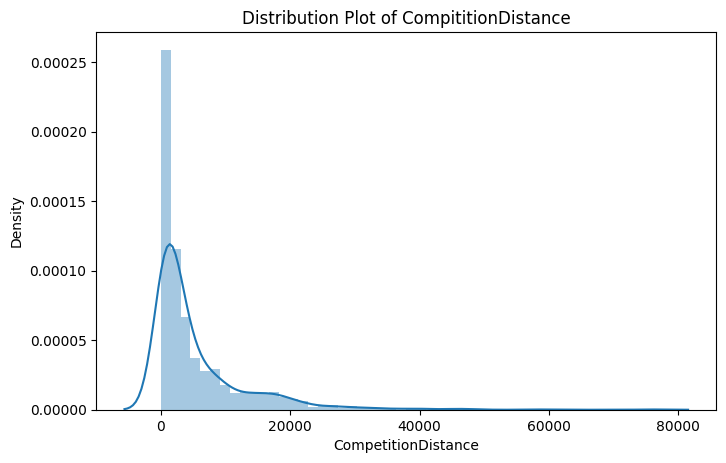

In [14]:
# Let's find the distribution of the CompititionDistance.
sns.distplot(store_df['CompetitionDistance'], hist = True)
plt.title('Distribution Plot of CompititionDistance')
plt.show()

This distribution is not normally distributed. So there are outliers in the column and that's why the distribution is skewed to the right. So it will be best to use median to fill missing values.

In [15]:
# Fill null values of CompetitionDistance column
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

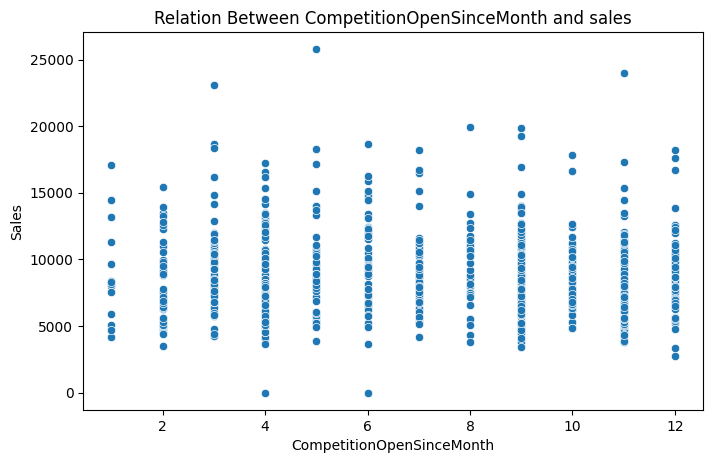

In [16]:
# Find the relation between CompetitionOpenSinceMonth/CompetitionOpenSinceYear and Sales
sns.scatterplot(store_df['CompetitionOpenSinceMonth'], sales_df['Sales'])
plt.title('Relation Between CompetitionOpenSinceMonth and sales')
plt.show()

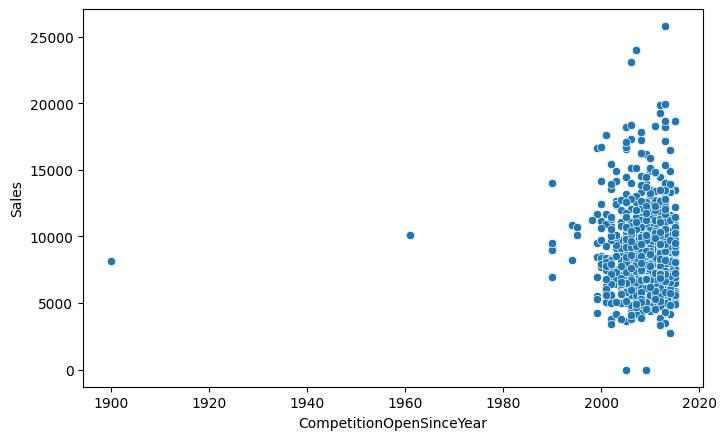

In [17]:
sns.scatterplot(store_df['CompetitionOpenSinceYear'], sales_df['Sales'])

There is relation betweeen CompetitionOpenSinceYear/CompetitionOpenSinceMonth and sales so we can't drop these columns. Now we will fill the missing values with the mode of that column. 

In [18]:
# Fill null values of CompetitionOpenSinceYear and CompetitionOpenSinceMonth columns
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

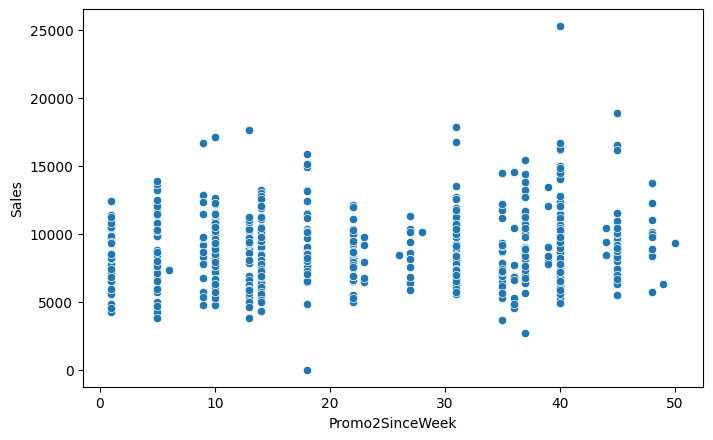

In [19]:
# Find the relation between Promo2SinceWeek/Promo2SinceYear/PromoInterval and Sales
sns.scatterplot(store_df['Promo2SinceWeek'], sales_df['Sales'])

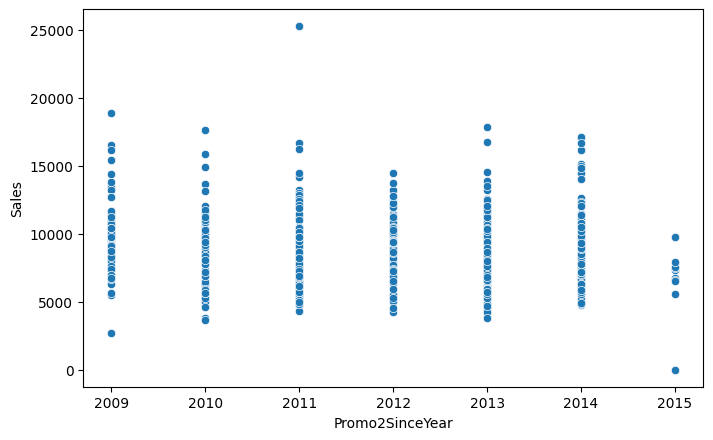

In [20]:
sns.scatterplot(store_df['Promo2SinceYear'], sales_df['Sales'])

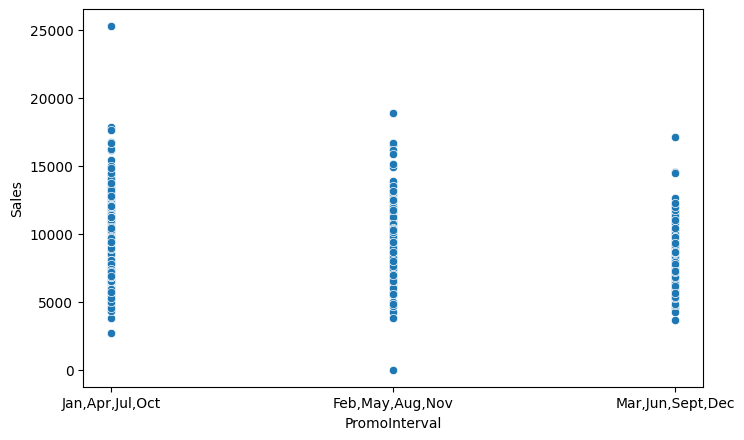

In [21]:
sns.scatterplot(store_df['PromoInterval'], sales_df['Sales'])

In [22]:
# Fill null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval columns with 0
store_df['Promo2SinceWeek'].fillna(0, inplace = True)
store_df['Promo2SinceYear'].fillna(0, inplace = True)
store_df['PromoInterval'].fillna(0, inplace = True)

In [23]:
# Number of missing values in the Store_df Dataset
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

So now we have treated all the missing values in our dataset

In [24]:
# Merge the store and sales dataset.
df = sales_df.merge(store_df, on = 'Store', how = 'left')

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What did you know about your dataset?

We can observe the following things from our dataset:


*   Sales_df dataset contain 1017209 rows and 9 colums. There were no missing values in this dataset and there are integer, datetime and object as datatype. This dataset has the target variable 'Sales'
*   Store_df dataset contains 1115 rows and 10 columns. There were some missing values in some columns, which we have filled with mode, median and 0 values. There are integer, float and object as datatype.



### What all manipulations have you done and insights you found?

We have done following manipulation in our dataset:


*   First we find which variable has missing values and then by analysing those features closely we find which tactics we should use to fill missing values in our dataset. 
*   Then we merge our two datasets, sales_df and store_df with left joint on the basis of Store variable.



## ***3. Understanding Your Variables***

In [27]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [28]:
# Dataset Describe
df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,508031.0
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [29]:
# Categorical Variables in the Dataset
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

len(categorical_variables)                    

13

In [30]:
# Numerical variables in dataset
numerical_variable = list(set(df.columns) - set(categorical_variables))
numerical_variable

['Date', 'Customers', 'CompetitionDistance', 'Store', 'Sales']

### Variables Description 

There are 13 categorical features and 5 numerical features. In numerical features we have target variable "Sales". 

### Check Unique Values for each variable.

In [31]:
df[categorical_variables[1]].unique()

array([1, 0])

In [32]:
# Check Unique Values for each variable.
for cat in categorical_variables:
  print(f'Unique Values of {cat}: {df[cat].unique()}')

Unique Values of DayOfWeek: [5 4 3 2 1 7 6]
Unique Values of Open: [1 0]
Unique Values of Promo: [1 0]
Unique Values of StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique Values of SchoolHoliday: [1 0]
Unique Values of StoreType: ['c' 'a' 'd' 'b']
Unique Values of Assortment: ['a' 'c' 'b']
Unique Values of CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique Values of CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique Values of Promo2: [0 1]
Unique Values of Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique Values of Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique Values of PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In StateHoliday variable there is zero unique value but one is in integer and other zero in string datatype. So we have to replace string datatype zero to integer datatype zero.

In [33]:
# replace string datatype 0 to int datatype 0
df['StateHoliday'].replace("0", 0, inplace = True)

In [34]:
df['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

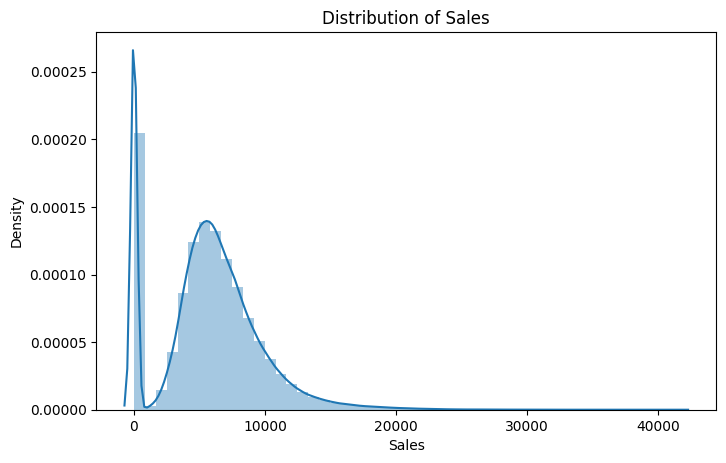

In [35]:
# Distribution of dependant variable Sales
sns.distplot(df['Sales'], hist= True)
plt.title('Distribution of Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The distplot is a useful tool for understanding the distribution of a dataset and identifying patterns and trends in the sales data.
It is a histogram that shows the frequency or density of sales data points

##### 2. What is/are the insight(s) found from the chart?

Sales distribution plot is normally distributed but there is some skew to right. But there is some very unusual in the chart. there is a peak in data at 0 sales. But why?

Because there are some stores which are temporarily closed due to refurbishment. So for them sales would be 0.

#### Chart - 2

In [36]:
# Put target varible as last element in the numerical_variable list
target_varible = numerical_variable[1]
numerical_variable.remove(target_varible)
numerical_variable.append(target_varible)
numerical_variable

['Date', 'CompetitionDistance', 'Store', 'Sales', 'Customers']

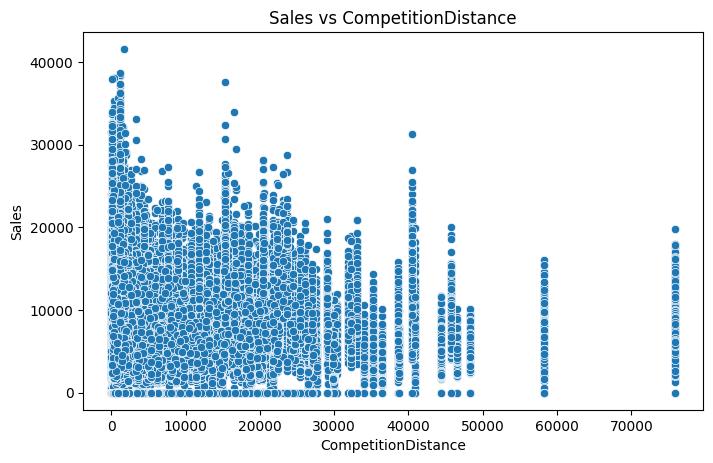

In [37]:
# Visual representation of CompetitionDistance w.r.t target variable Sales
sns.scatterplot(df['CompetitionDistance'], df['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.show()

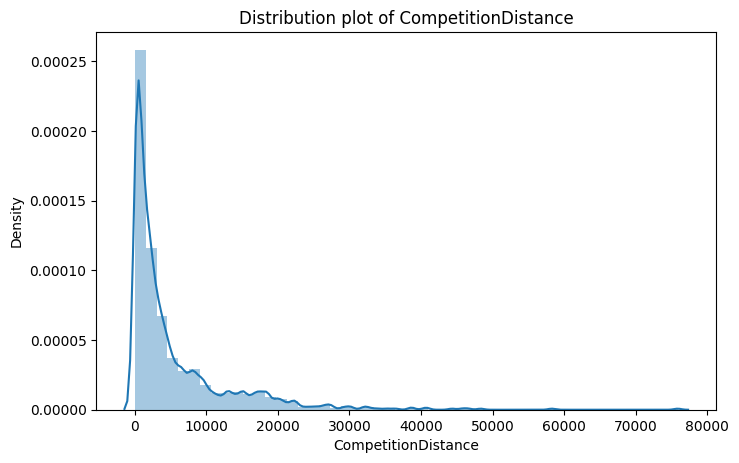

In [38]:
sns.distplot(df['CompetitionDistance'], hist = True)
plt.title('Distribution plot of CompetitionDistance')
plt.show()

##### 1. Why did you pick the specific chart?

We use scatter plot to represent relationship between sales and CompititionDistance because scatterplot can show points effectively of every datapoint. Here every point is a store which we can't represent by line or bar plot. 

We also use distribution plot for CompititionDistance which will give more clear insights about the compititors store distance with each other.

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

We can also get clear insights from distribution plot that most of the stores are very close to each others. There are only few stores which are on long distance. Most of the stores are in the range of 1000 meters(1 KM).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By the scatterplot of sales and CompititionDistance we can see that there is no major effect on sales because of distance. There are stores located nearely to each other.

#### Chart - 3

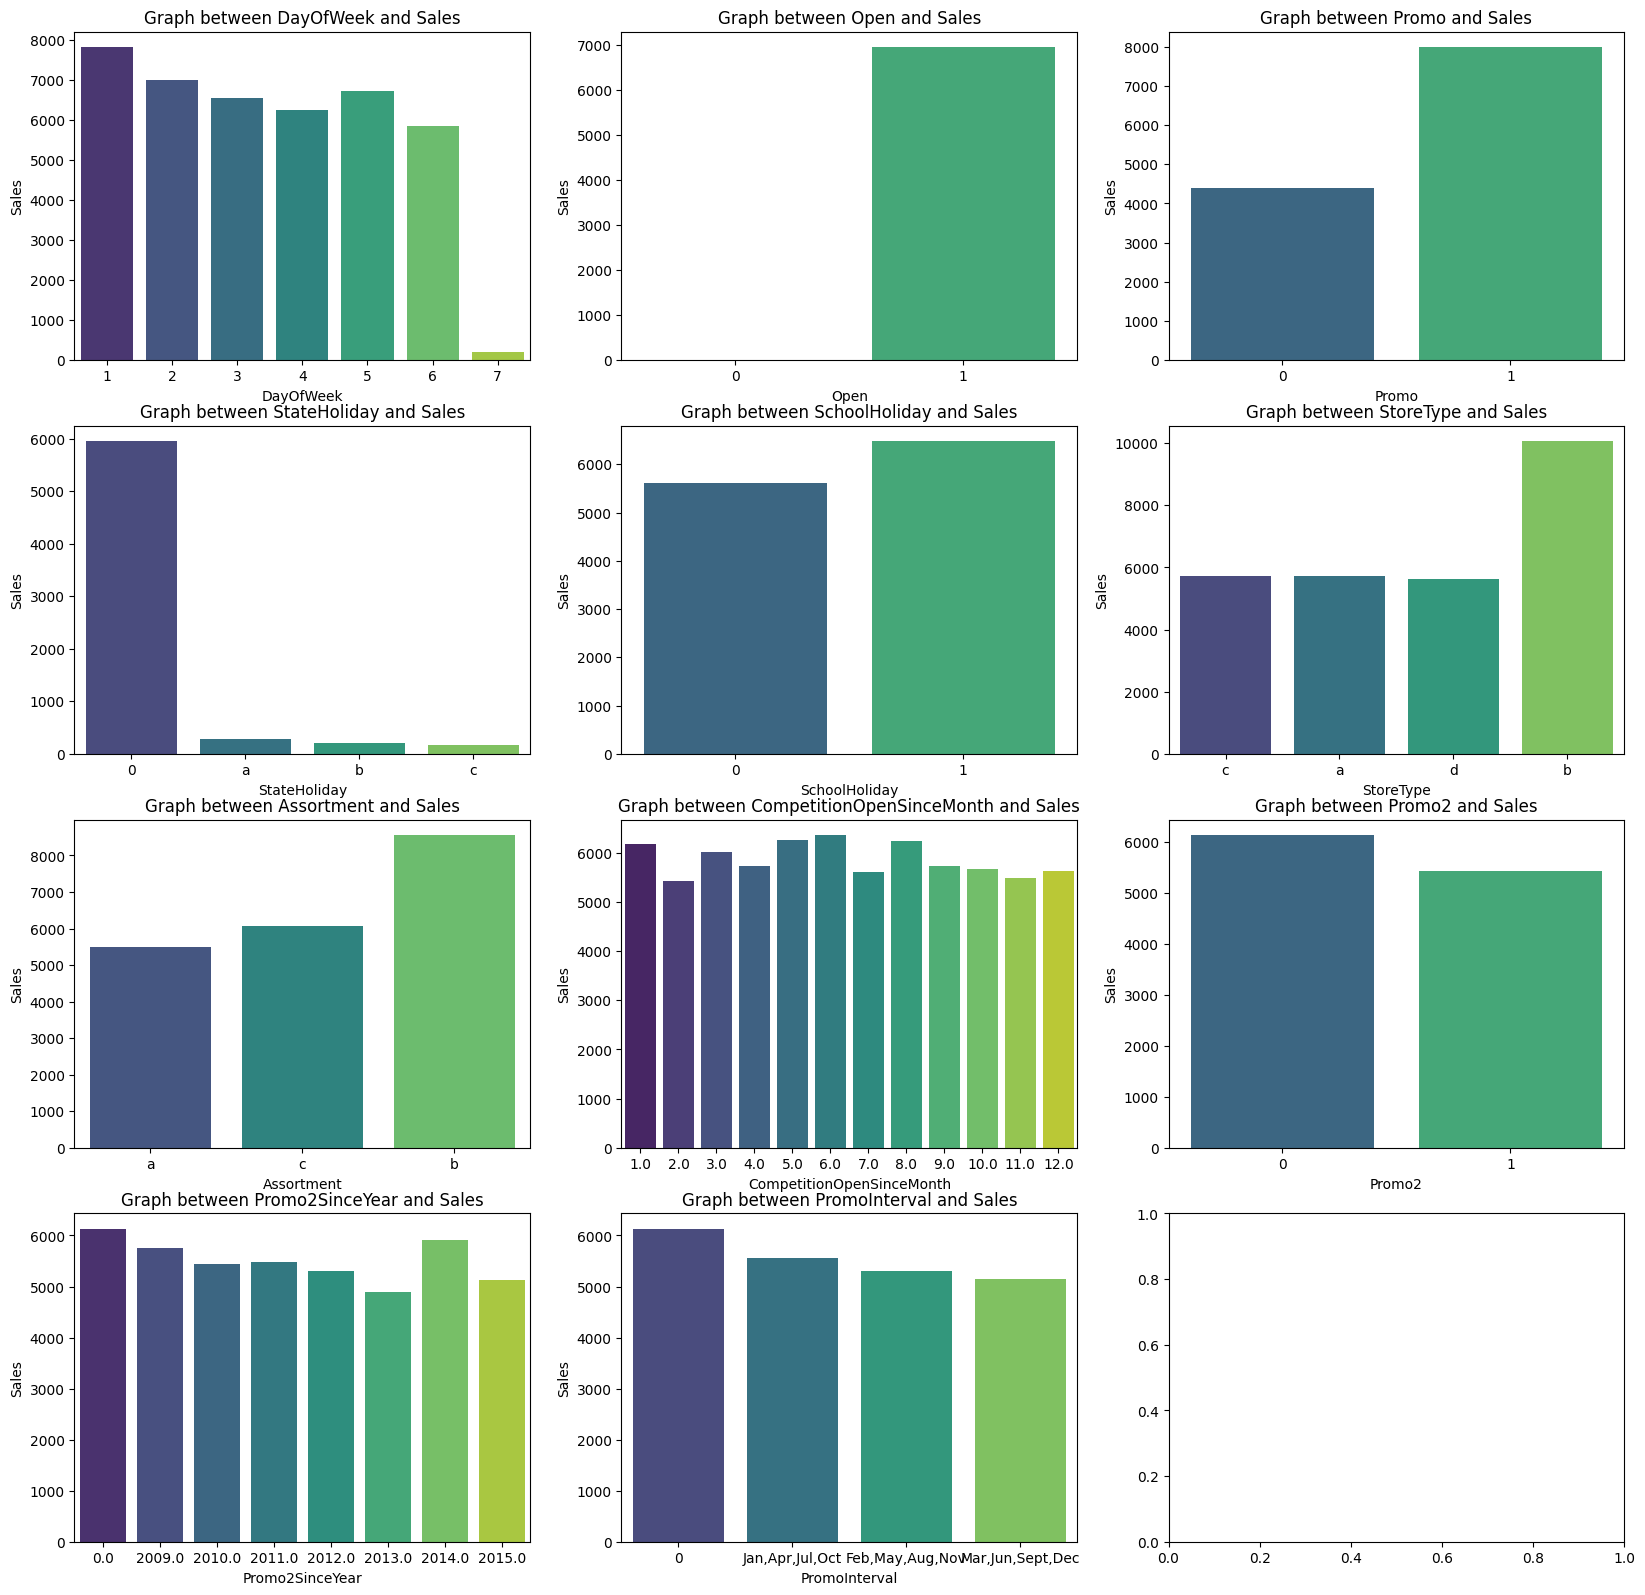

In [39]:
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

fig, axs = plt.subplots(4, 3,figsize=(20, 20))
# j and k is for iterating through axis in subplot
j=0
k=-1
for i in categorical_variables:
# Updating j and k for plotting on subplot  
  k+=1
  if k>2:
    k=0
    j+=1
  sns.barplot(x=df[i], y='Sales', data=df, ci=None, ax=axs[j, k],palette='viridis')
  axs[j,k].set(title = f'Graph between {i} and Sales', xlabel=i, ylabel='Sales')

##### 1. Why did you pick the specific chart?

For categorical dataset bar plot is best in all. These Bar plots tell relationship between sales and categorical variables. 

##### 2. What is/are the insight(s) found from the chart?

####Observation:
*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.


#### Chart - 4

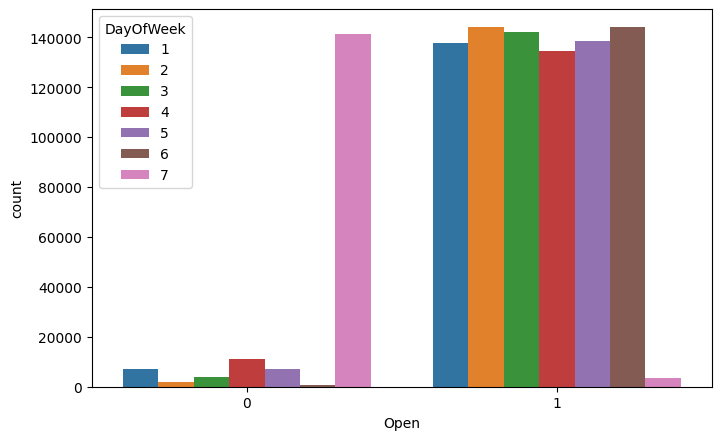

In [40]:
#Lets see how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])
plt.show()

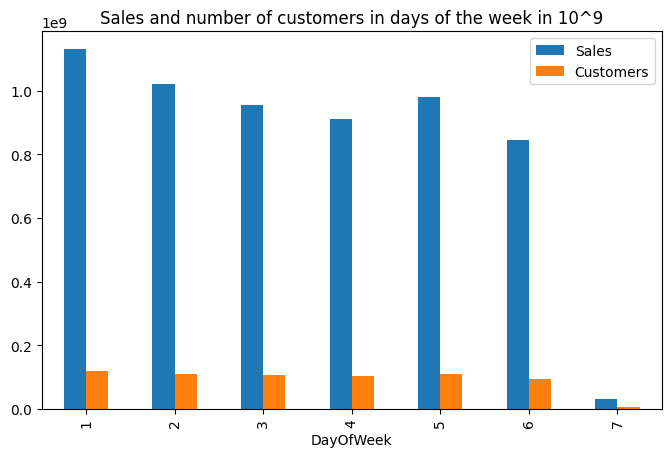

In [41]:
# Let's see number of sales in day of the week 
df.groupby("DayOfWeek")["Sales", "Customers"].sum().plot.bar(title = 'Sales and number of customers in days of the week in 10^9')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

### **Observation:**
This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays. 

#### Chart - 5

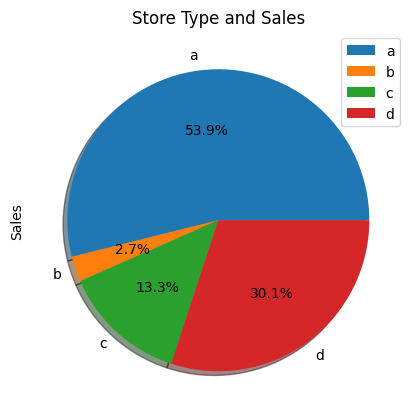

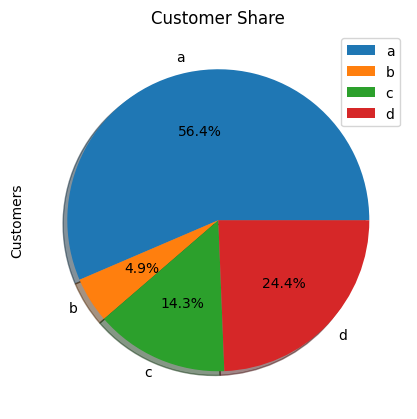

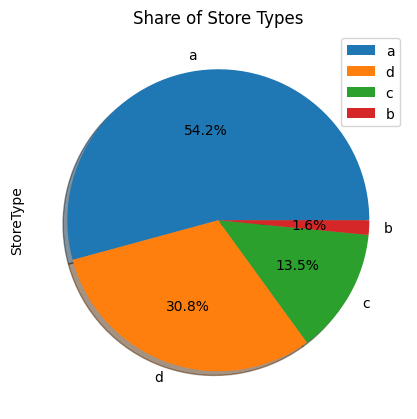

In [42]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

I want to know in which propotion the store type hold the sales and number of customers shares.

##### 2. What is/are the insight(s) found from the chart?

####Observation:
* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean. 
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.



#### Chart - 6

### **Monthly Sales Over Year**

In [43]:
df['Date'] = pd.to_datetime(df['Date'])

In [44]:
# Extracting year, month from date variable
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [45]:
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear

In [46]:
df['Year'].unique()

array([2015, 2014, 2013])

In [47]:
#monthly sales
sales_2013 = df[df['Year'] == 2013].groupby('Month')['Sales'].sum().reset_index()
sales_2014 = df[df['Year'] == 2014].groupby('Month')['Sales'].sum().reset_index()
sales_2015 = df[df['Year'] == 2015].groupby('Month')['Sales'].sum().reset_index()

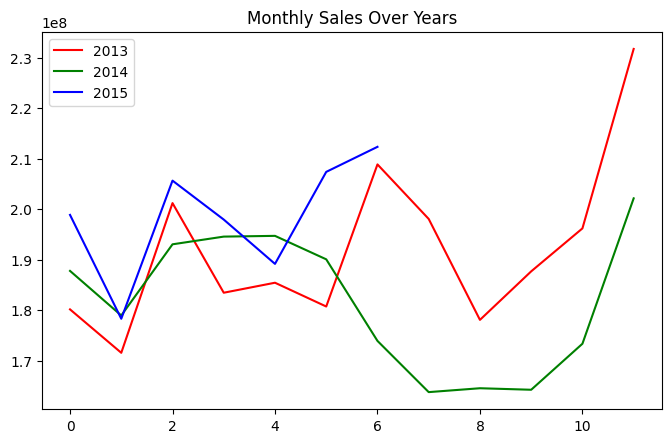

In [48]:
#plotting monthly sales over year
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='green')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='blue')
plt.title('Monthly Sales Over Years')
plt.legend()

##### 1. Why did you pick the specific chart?

I was curious to know the trend in sales with respect to months in whole year. Line plot is best way to represent trend in sales wrt to months.

##### 2. What is/are the insight(s) found from the chart?

Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Correlation Heatmap

In [49]:
# let's first drop unnecessory numeric column.
corr_df = df.drop(columns = ['Store', 'Year'], axis = 1)

In [50]:
corr_df['StateHoliday'].replace({'a':1, 'b':1, 'c':1}, inplace = True)

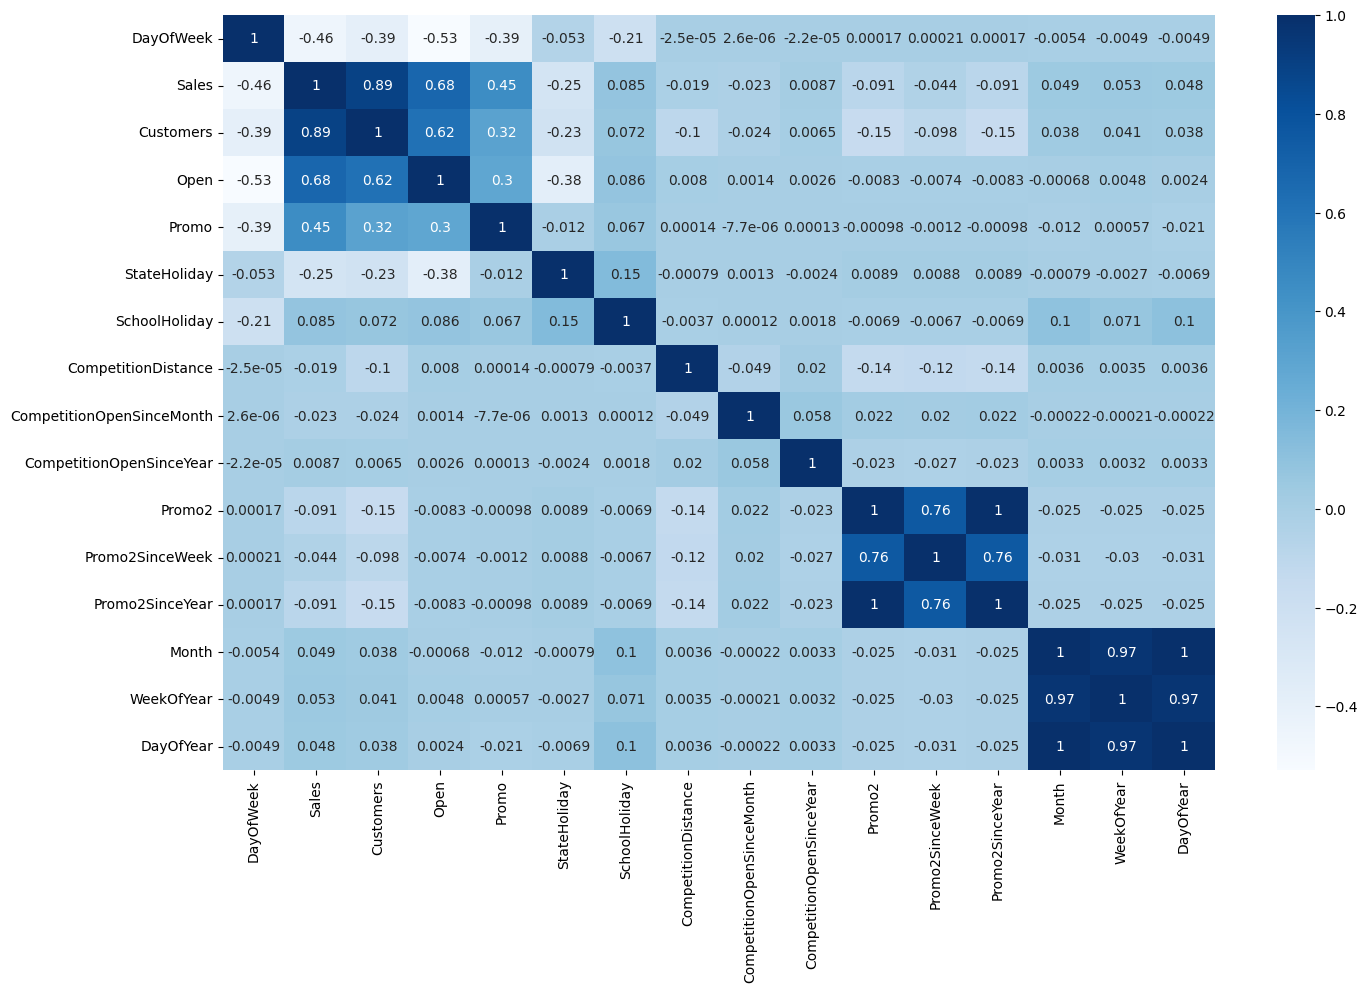

In [51]:
plt.figure(figsize = (16,10))
sns.heatmap(corr_df.corr(), annot=True, cmap = 'Blues')

##### 1. Why did you pick the specific chart?

 We want to know the correlation between numerical variables in our dataset. From this parameter we can find out is there any multicollinearity in our dataset or not. If yes then we will try to decrease this in the process of feature engineering.

##### 2. What is/are the insight(s) found from the chart?

* We can see multicollinearity between sales and customer which is expected. There is multicollinearity between sales/customer and promotion too which tells increase in the promotion, increase the sales and number of customers.
* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.


#### Chart - 15 - Pair Plot 

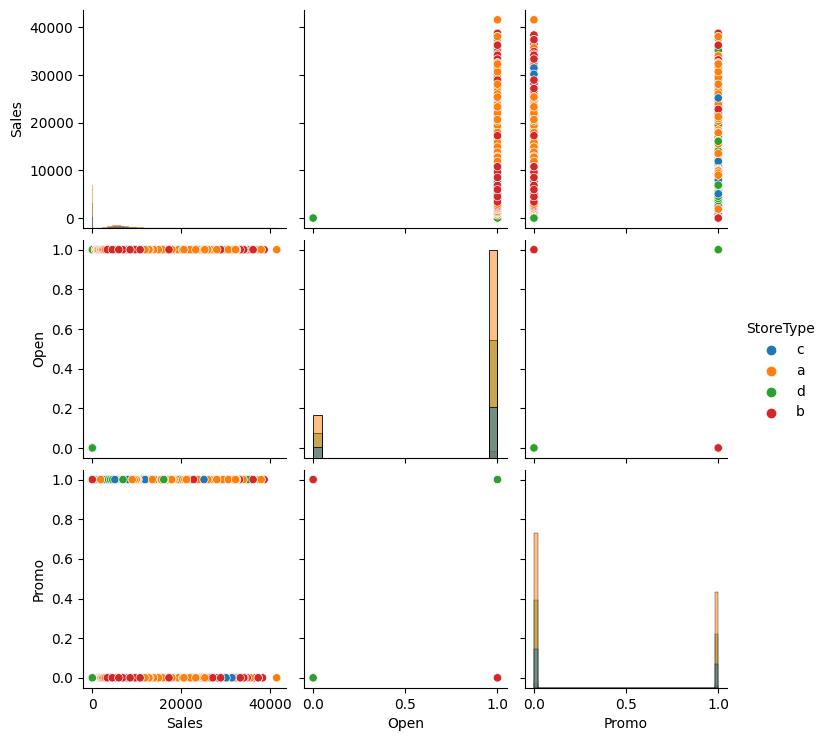

In [53]:
# # Pair Plot visualization code
# pairplot_var = df.loc[:, ['Sales', 'Open','Promo', 'StoreType']]
# sns.pairplot(pairplot_var, diag_kind="hist", hue = 'StoreType')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### **1st Hypothesis:**

The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.

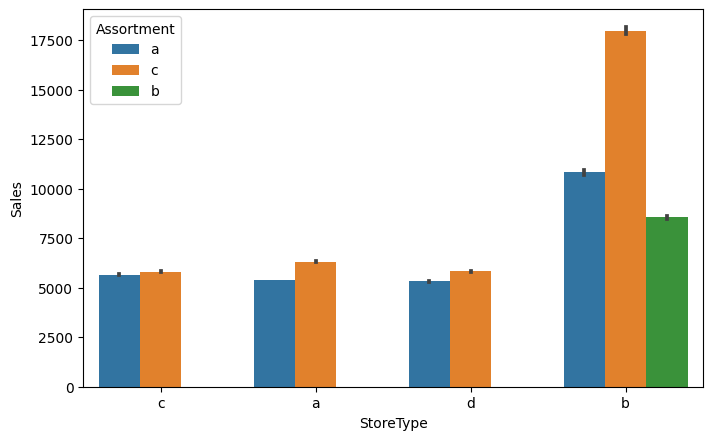

In [54]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

**Hypothesis Validation**

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why **average** sales were high for store type b stores.

b type Assortment strategy increase the average number of sales, and only b type of stores have this authority to use b type of assortment strategy. But this is average sales of every store type.

Let's see number of store of every store type, this will give better insight why store type b has average sales high but number of sales is higher of store type a.

In [55]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


### **2nd Hypothesis:**
Customers would have a positive correlation with Sales.

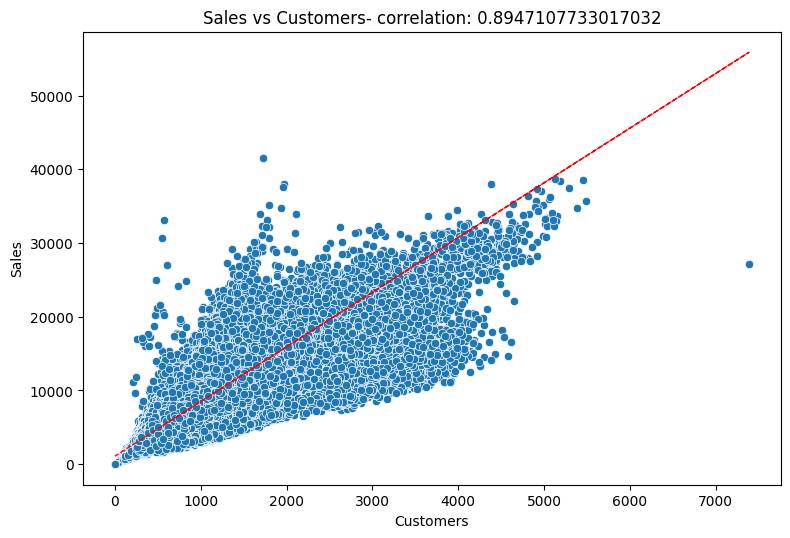

In [56]:
# Visual representation of Customers w.r.t target variable Sales
col = 'Customers'
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Customers']
label = df['Sales']
correlation = feature.corr(label)
sns.scatterplot(x=feature, y=label)
plt.xlabel(col)
plt.ylabel('Sales')
ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
z = np.polyfit(df[col], df['Sales'], 1)   #this create coefficient and residual (b) of equetion
y_hat1 = np.poly1d(z)   #this create polynomial equetion with the help of coeff
y_hat = y_hat1(df[col]) # this create respected value of y when we put x in eque

plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

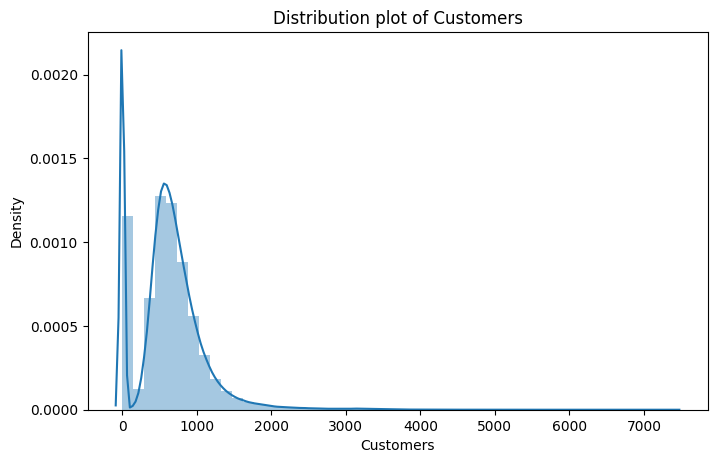

In [57]:
sns.distplot(df['Customers'], hist = True)
plt.title('Distribution plot of Customers')
plt.show()

**Hypothesis Validation**

We can clearly observe from the scatter chart that there is propotion relation between sales and customer, more the customers more the sales.

But there is something important to note from distribution plot that there is a peak at 0 customer, same as distribution plot of sales. We can see from the below filter of 0 customer that when shops are not open which is due to refurbishment.

So we can infere that this peak of customer at 0 is because of the close shops. Which we have to remove.

### **3rd Hypothesis:**
Promotion should be having a positive correlation with Sales.

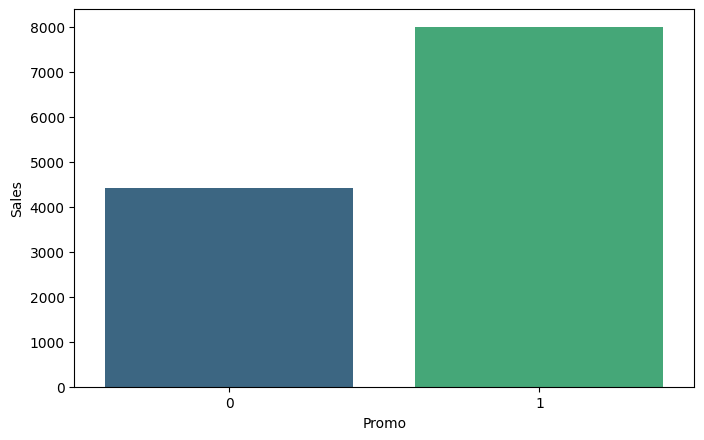

In [58]:
sns.barplot(x=df['Promo'], y='Sales', data=df, ci=None, palette='viridis')

**Hypothesis Validation**

Here we can see from above bar plot that who run some promotion get higher number of sales.

## ***6. Feature Engineering & Data Pre-processing***

In [59]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 22)

We don't want to deal with 0 sales data. So let's make another dataframe which have only data with some sales.

In [60]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [61]:
# check
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


### 1. Handling Missing Values

In [62]:
# We have already deal with missing values in our data during the process of data wranggling.

### 3. Categorical Encoding

In [63]:
#changing into boolean 
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We need to convert StateHoliday values in some numeric values so we replaced letters into boolean values.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [65]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [66]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [67]:
df1.head()

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85            0.0              0  
           259           0.0              0  
           262           0.0              0  
           274           0.0              1  
           335           0.0              1

#### 2. Feature Selection

In [68]:
# Now we have done feature selection already above and after feature selection our final dataframe is df1
important_features = df1.columns
important_features

Index(['DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'Year', 'Month', 'WeekOfYear', 'DayOfYear', 'CompetitionOpen',
       'Promo2Open', 'Promo2running'],
      dtype='object')

##### Which all features you found important and why?

Below is the feature we found important in case of model preparation:


*   DayOfWeek
*   Sales
*   Customers
*   Promo
*   StateHoliday
*   SchoolHoliday
*   StoreType
*   Assortment
*   CompititionDistance
*   Promo2
*   Year
*   Month
*   WeekOfYear
*   DayofYear
*   CompetitionOpen
*   Promo2Open
*   Promo2running

These feature play important role to measure the sales. They have major impact on the target variable sales. 

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

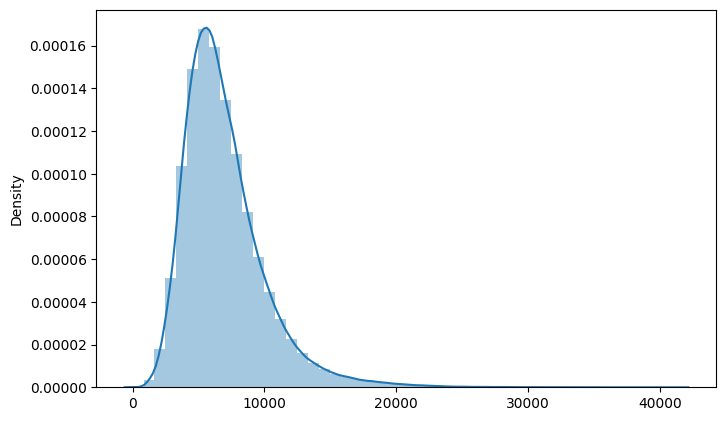

In [69]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df1['Sales'])

In [70]:
# transformation
df1['Sales'] = np.log(df1['Sales'])

In [71]:
df1.dropna(inplace=True)

In [72]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

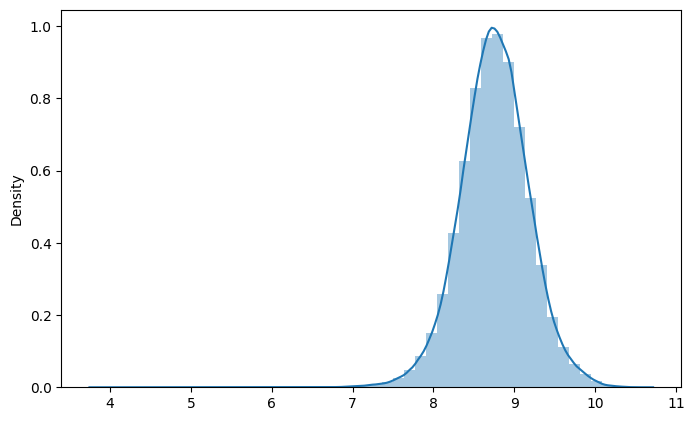

In [73]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

### 2. Handling Outliers

####Outliers and Z score:
In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

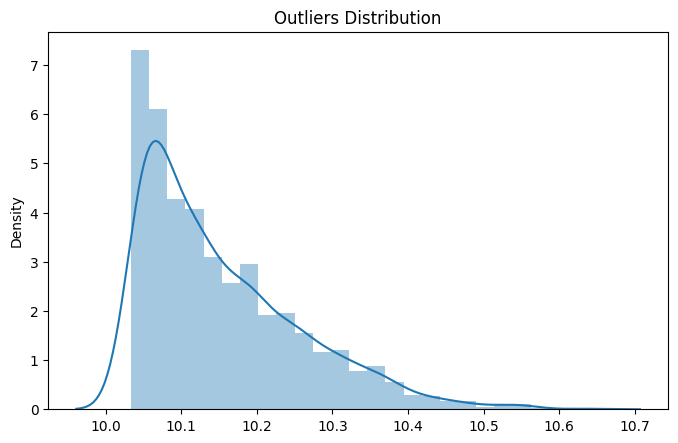

In [74]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

The data points with sales value higher than 10.2 are very low and hence they can be considered as outliers. The percentage of outliers in our dataset:

In [75]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [76]:
#exploring the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,2013,1,2,8,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,21,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,22,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0,0,a,c,870.0,0,2015,7,29,194,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0,0,b,a,1180.0,0,2015,7,29,200,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0,0,b,a,1180.0,0,2015,7,30,207,26.0,0.0,0


####Observation:
Some interesting insights can be drawn from these outliers dataframe:
* First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B. 
* All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
* It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.


In [77]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,41,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,69,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


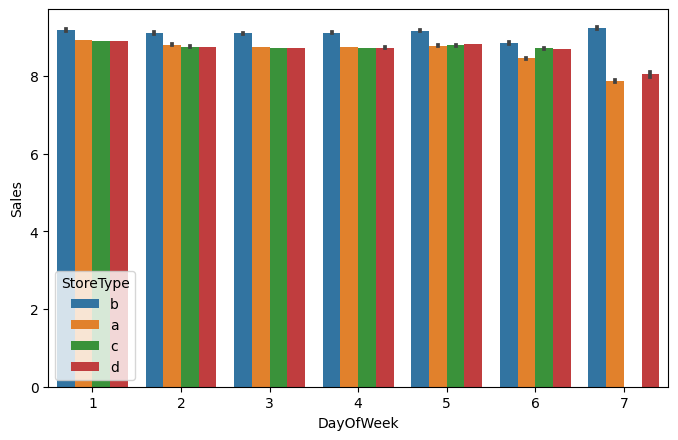

In [78]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [79]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-06 85          0  2013      1           1          6             15.0   
           259         0  2013      1           1          6              0.0   
           262         0  2013      1           1          6              0.0   
           274         1  2013      1           1          6              0.0   
           335         1  2013      1           1          6              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-26 733         0  2015      7          30        207            189.0   
           769         1  2015      7          30        207             22.0   
           948         0  2015      7          30        207             22.0   
           1081        0  2015      7          30        207            112.0   
           1097        0  2015      7          30        207            160.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-06 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-26 733      0.000000              0  
           769     31.857534              1  
           948      0.000000              0  
           1081     0.000000              0  
           1097     0.000000              0  

[2216 rows x 17 columns]

####Observation:
* This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
* Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Outlier Treatment**

- It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.
- The primary reasons for the behaviour are promotion and store type B.
- If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

### 8. Data Splitting

In [80]:
#Let's copy this dataframe so that if something wrong heppen then our original dataframe stay secure.
df2 = df1.copy()

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 844338 entries, (Timestamp('2013-01-01 00:00:00'), 85) to (Timestamp('2015-07-31 00:00:00'), 1115)
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            844338 non-null  int64  
 1   Sales                844338 non-null  float64
 2   Customers            844338 non-null  int64  
 3   Promo                844338 non-null  int64  
 4   StateHoliday         844338 non-null  int64  
 5   SchoolHoliday        844338 non-null  int64  
 6   StoreType            844338 non-null  object 
 7   Assortment           844338 non-null  object 
 8   CompetitionDistance  844338 non-null  float64
 9   Promo2               844338 non-null  int64  
 10  Year                 844338 non-null  int64  
 11  Month                844338 non-null  int64  
 12  WeekOfYear           844338 non-null  int64  
 13  DayOfYear            844338 non-null  int64  
 1

In [82]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [83]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [84]:
df2

DayOfWeek  Promo  StateHoliday  SchoolHoliday StoreType  \
Date       Store                                                            
2013-01-01 85             2      0             1              1         b   
           259            2      0             1              1         b   
           262            2      0             1              1         b   
           274            2      0             1              1         b   
           335            2      0             1              1         b   
...                     ...    ...           ...            ...       ...   
2015-07-31 1111           5      1             0              1         a   
           1112           5      1             0              1         c   
           1113           5      1             0              1         a   
           1114           5      1             0              1         a   
           1115           5      1             0              1         d   

                 Assortment  CompetitionDistance  Promo2  Year  Month  \
Date       Store                                                        
2013-01-01 85             a               1870.0       0  2013      1   
           259            b                210.0       0  2013      1   
           262            a               1180.0       0  2013      1   
           274            b               3640.0       1  2013      1   
           335            a                 90.0       1  2013      1   
...                     ...                  ...     ...   ...    ...   
2015-07-31 1111           a               1900.0       1  2015      7   
           1112           c               1880.0       0  2015      7   
           1113           c               9260.0       0  2015      7   
           1114           c                870.0       0  2015      7   
           1115           c               5350.0       1  2015      7   

                  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                       
2013-01-01 85              1          1             15.0    0.000000   
           259             1          1              0.0    0.000000   
           262             1          1              0.0    0.000000   
           274             1          1              0.0    0.000000   
           335             1          1              0.0    0.000000   
...                      ...        ...              ...         ...   
2015-07-31 1111           31        212             13.0   24.000000   
           1112           31        212            111.0    0.000000   
           1113           31        212             22.0    0.000000   
           1114           31        212             22.0    0.000000   
           1115           31        212             22.0   38.071233   

                  Promo2running      Sales  
Date       Store                            
2013-01-01 85                 0   8.347590  
           259                0   8.832150  
           262                0   9.756552  
           274                1   8.039802  
           335                1   7.783641  
...                         ...        ...  
2015-07-31 1111               1   8.652248  
           1112               0   9.172223  
           1113               0   8.894122  
           1114               0  10.222232  
           1115               0   9.068777  

[844338 rows x 16 columns]

In [85]:
df2.shape

(844338, 16)

In [86]:
dependant_varible = ["Sales"]
df[dependant_varible]


,Sales
0,5263
1,6064
2,8314
3,13995
4,4822
...,...
1017204,0
1017205,0
1017206,0
1017207,0


In [87]:
independant_variables = list(df2.drop('Sales', axis=1).columns)
independant_variables


['DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'Year',
 'Month',
 'WeekOfYear',
 'DayOfYear',
 'CompetitionOpen',
 'Promo2Open',
 'Promo2running']

In [128]:
# #slicing the most recent six weeks and creating train and test set
# #train
# start_train = pd.to_datetime("2013-01-01")
# end_train = pd.to_datetime("2015-06-14")
# df_train = df2.loc[start_train:end_train]
# #test
# start_test = pd.to_datetime("2015-06-15")
# end_test = pd.to_datetime("2015-07-31")
# df_test = df2.loc[start_test:end_test]

In [129]:
# #X and y split for train and test 
# X_train = df_train.drop('Sales',axis=1)
# y_train = df_train[['Sales']]
# X_test = df_test.drop('Sales',axis=1)
# y_test = df_test[['Sales']]
# print(f'The shape of X_train is: {X_train.shape}')
# print(f'The shape of y_train is: {y_train.shape}')
# print(f'The shape of X_test is: {X_test.shape}')
# print(f'The shape of y_test is: {y_test.shape}')

In [88]:
X = df2[independant_variables]
X.shape

(844338, 15)

In [131]:
# X_train = X_train.iloc[int((X_train.shape)[0]/3):, :]
# X_train.shape

In [132]:
# y_train = y_train.iloc[int((y_train.shape)[0]/3):, :]
# y_train.shape

In [133]:
# X_test = X_test.iloc[int((X_test.shape)[0]/3):, :]
# X_test.shape

In [134]:
# y_test = y_test.iloc[int((y_test.shape)[0]/3):, :]
# y_test.shape

In [89]:
y = df2[dependant_varible]
y.shape

(844338, 1)

In [136]:
# y = df2[dependant_varible].iloc[int((y.shape)[0]/2):, :]

In [137]:
# y.shape

In [90]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.1, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(759904, 15)
(84434, 15)


In [91]:
y_train.head()

,,Sales
Date,Store,
2015-01-10,987,8.310169
2014-04-04,623,9.056606
2013-04-03,425,7.816417
2013-06-22,482,9.180706
2013-10-02,853,9.032409


In [92]:
X_test.head()

,,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,
2014-08-23,502,6,0,0,1,a,a,220.0,1,2014,8,34,235,150.0,59.309589,0
2015-06-26,978,5,0,0,0,c,c,3890.0,0,2015,6,26,177,21.0,0.000000,0
2015-07-27,237,1,1,0,1,a,a,1420.0,0,2015,7,31,208,92.0,0.000000,0
2014-01-04,858,6,0,0,0,a,a,3370.0,1,2014,1,1,4,61.0,0.000000,1
2013-07-16,561,2,1,0,0,d,a,14300.0,0,2013,7,29,197,0.0,0.000000,0


##### What data splitting ratio have you used and why? 

We used 90:10 split ratio for train and test data respectively. We split it in this ratio because we don't want larger data for testing. 84434 is enough for testing. 

## ***7. ML Model Implementation***

##Modeling
**Factors affecting in choosing the model:**
 
Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:
- A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as peak days, festive seasons etc which would most likely be considered as outliers in simple linear regression.
- Having X columns with 30% continuous and 70% categorical features. Business prefers the model to be interpretable in nature and decision based algorithms work better with categorical data.

### ML Model - 1: Decision Tree

In [93]:
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

In [94]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

In [95]:
# Check the data after scaling
X_test

,,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Date,Store,,,,,,,,,,,,,,,,,,,,,
2014-08-23,502,-0.897919,-0.032927,2.040392,-0.670285,1.002709,0.216527,0.647445,0.718790,0.715690,1.654025,...,-0.443047,2.203961,-0.065223,0.919446,-0.136771,-0.392646,-0.66428,0.947366,-0.098969,-0.929090
2015-06-26,978,-0.897919,-0.032927,-0.490102,-0.199488,-0.997298,1.503031,0.045687,0.162780,0.143444,-0.368358,...,2.257098,-0.453728,-0.065223,-1.087611,-0.136771,2.546821,-0.66428,-1.055558,-0.098969,1.076322
2015-07-27,237,1.113686,-0.032927,2.040392,-0.516346,-0.997298,1.503031,0.346566,0.510286,0.449300,0.744736,...,-0.443047,-0.453728,-0.065223,0.919446,-0.136771,-0.392646,-0.66428,0.947366,-0.098969,-0.929090
2014-01-04,858,-0.897919,-0.032927,-0.490102,-0.266195,1.002709,0.216527,-1.458710,-1.574751,-1.563428,0.258738,...,-0.443047,2.203961,-0.065223,0.919446,-0.136771,-0.392646,-0.66428,0.947366,-0.098969,-0.929090
2013-07-16,561,1.113686,-0.032927,-0.490102,1.135932,-0.997298,-1.069976,0.346566,0.371284,0.340770,-0.697583,...,-0.443047,-0.453728,-0.065223,-1.087611,-0.136771,-0.392646,1.50539,0.947366,-0.098969,-0.929090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-11,495,-0.897919,-0.032927,-0.490102,0.003198,1.002709,0.216527,-0.856951,-0.879738,-0.912251,-0.603518,...,-0.443047,-0.453728,-0.065223,-1.087611,-0.136771,-0.392646,1.50539,0.947366,-0.098969,-0.929090
2013-05-15,899,1.113686,-0.032927,-0.490102,-0.366255,1.002709,-1.069976,-0.255193,-0.254227,-0.270941,-0.697583,...,-0.443047,-0.453728,-0.065223,-1.087611,-0.136771,-0.392646,1.50539,0.947366,-0.098969,-0.929090
2013-03-09,74,-0.897919,-0.032927,-0.490102,-0.656174,-0.997298,-1.069976,-0.856951,-0.949240,-0.931984,-0.697583,...,-0.443047,2.203961,-0.065223,0.919446,-0.136771,-0.392646,-0.66428,0.947366,-0.098969,-0.929090


In [96]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [97]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [98]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  # global plot
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  # plt.figure(figsize=(20, 10))
  sns.lineplot(data = plot[880:])
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

The Mean Absolute Error for the validation set is 0.290541
The Mean Squared Error for the validation set is 0.180165
The Root Mean Squared Error for the validation set is 0.424459
The R^2 for the validation set is 0.81969
The Adjusted R^2 for the validation set is 0.819634


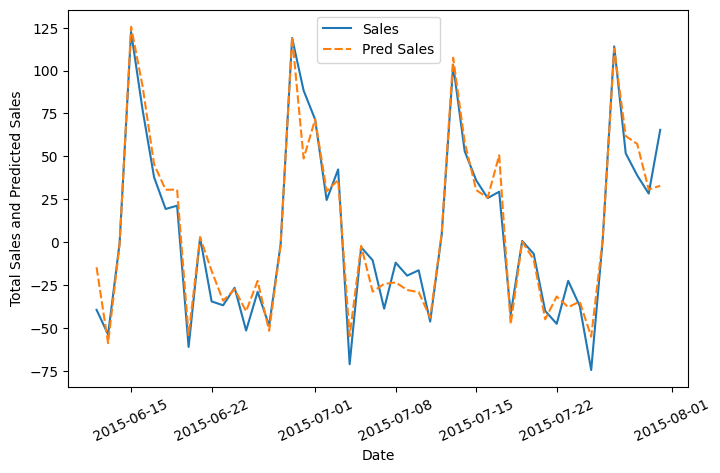

In [100]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [101]:
#add results to comparison df
add_list_to_final_df(decision_tree)

In [102]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003392,0.002879,0.05366,0.997121,0.99712,0.290541,0.180165,0.424459,0.81969,0.819634


####Observation:
- The baseline model- Decision tree was chosen considering our features were mostly categorical with few having continuous importance. The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points. 
- Businesses prefer the model to be interpretable in nature in order to understand the patterns and strategize accordingly unlike any scientific facility where the results matter much more than interpretability.
- If interpretability is important then sticking with tree based algorithms when most of the features are categorical; is beneficial and using tuned Hyperparameters to grow the tree deep enough without overfitting.

### ML Model - 2: Random Forest

In [103]:
# fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Mean Absolute Error for the validation set is 0.226094
The Mean Squared Error for the validation set is 0.106763
The Root Mean Squared Error for the validation set is 0.326746
The R^2 for the validation set is 0.893151
The Adjusted R^2 for the validation set is 0.893118


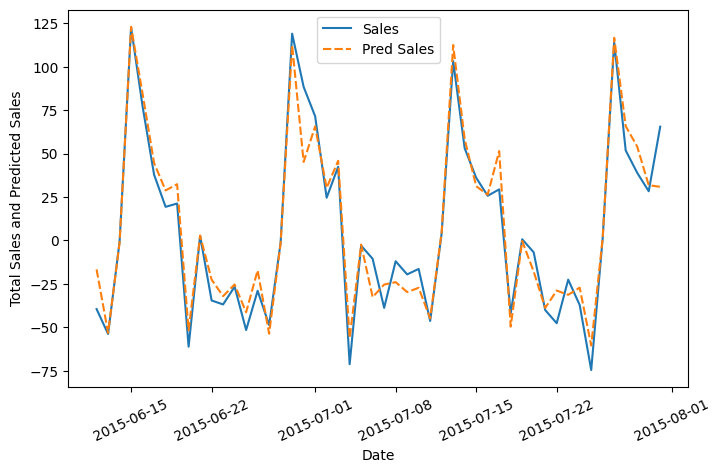

In [104]:
#model evaluation
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [105]:
# updating comparison df
add_list_to_final_df(random_f)

In [106]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003392,0.002879,0.053660,0.997121,0.997120,0.290541,0.180165,0.424459,0.819690,0.819634
1,Random Forest Regressor,0.084528,0.016444,0.128235,0.983556,0.983555,0.226094,0.106763,0.326746,0.893151,0.893118


In [107]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


####Observation:
Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.

In [108]:
# Save this comparison_df to our drive
comparison_data = comparison_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Module 4/Retail Sales Prediction - Mohd Zahid Ansari/Data/comparison_data.csv")


In [109]:
comparison_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 4/Retail Sales Prediction - Mohd Zahid Ansari/Data/comparison_data.csv")
comparison_df

,Unnamed: 0,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,0,Decision Tree Regressor,0.003392,0.002879,0.053660,0.997121,0.997120,0.290541,0.180165,0.424459,0.819690,0.819634
1,1,Random Forest Regressor,0.084528,0.016444,0.128235,0.983556,0.983555,0.226094,0.106763,0.326746,0.893151,0.893118


## **IMPORTANT NOTE:**

We have to terminate the runtime here because our colab will crash when we will do Cross validation and hyperparameter tuning process. 

So after terminate the runtime we will again connect our colab and run all the cells before random forest model. 

After that we will skip the random forest model and will not run it and directly run the cross validation and hyperparameter tuning model. 

Because we have already store the score chart of the baseline model and random forest model in our drive. So we will append the score chart of Hyperparameter tuning model to it and that is how we can complete our project without colab crash. :)

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_tuned = RandomForestRegressor()
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

# Fit the Algorithm
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 6.6min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 6.8min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 6.7min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.9min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.9min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.8min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [121]:
#best para
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [122]:
#save the best parameters
random_t = rf_random.best_estimator_

###Model Performance and Evaluation

The Mean Absolute Error for the validation set is 0.225735
The Mean Squared Error for the validation set is 0.105473
The Root Mean Squared Error for the validation set is 0.324766
The R^2 for the validation set is 0.894442
The Adjusted R^2 for the validation set is 0.89441


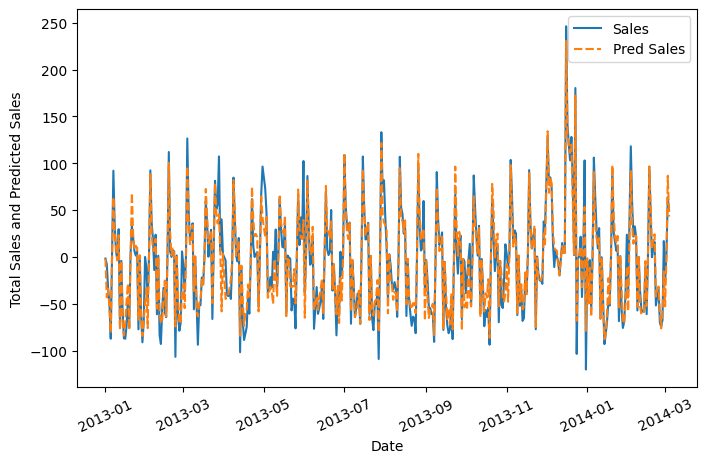

In [123]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

In [124]:
#add to comparison_df
comparison_df = comparison_df.append(random_tuned)

In [125]:
#comparison_df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003392,0.002879,0.053660,0.997121,0.997120,0.290541,0.180165,0.424459,0.819690,0.819634
0,Random Forest Tuned,0.125763,0.034986,0.187046,0.965014,0.965013,0.225735,0.105473,0.324766,0.894442,0.894410


####Feature Importance

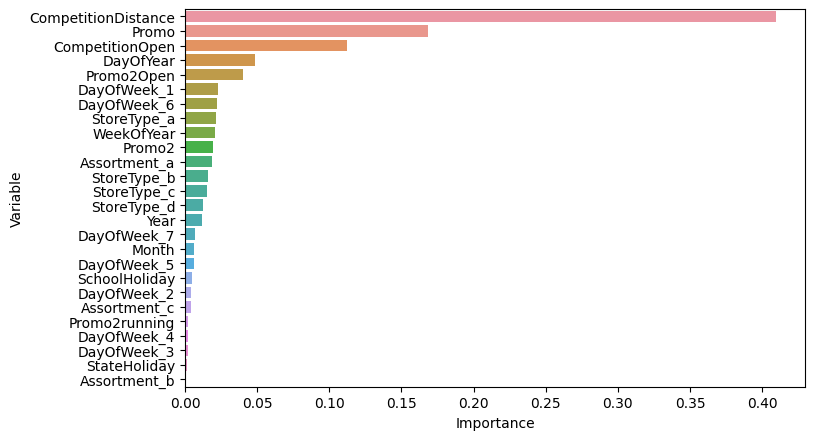

In [126]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003878,0.003312,0.057546,0.996688,0.996688,0.352994,0.260285,0.510182,0.723680,0.723524
0,Random Forest Tuned,0.084110,0.016638,0.128990,0.983362,0.983361,0.271569,0.143207,0.378427,0.847971,0.847885


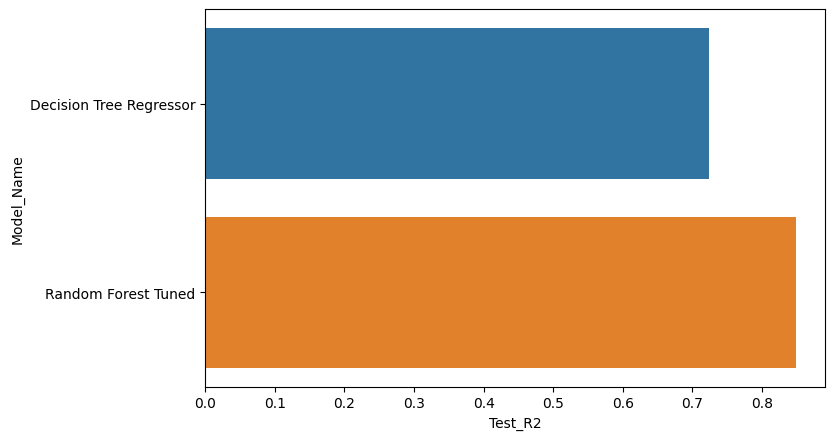

In [ ]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])

####Random Forest vs Baseline Model

In [110]:
#test values
baseline_r2 = 0.819690
random_r2 = 0.893151	
r_tuned_r2 = 0.894442	

In [111]:
#improvement % 
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 8.962 % was seen in Random Forest against Decision Tree.


####Random Forest Tuned vs Baseline and Random Forest Models

In [112]:
#improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 9.12 % was seen in Random Forest Tuned against Decision Tree.


In [113]:

#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 0.145 % was seen in Random Forest Tuned against Simple Random Forest.


Observation

* The maximum R^2 was seen in Random Forest model with the value 0.848617 which was 17.324 % improved from a decision tree model. But there is decrease in r2 score in Tuned Random Forest. 
* It seems like we have maxed out on performance with the data and these models.

###Store wise Sales Predictions

In [127]:
#predictions 
y_pred_test = random_t.predict(X_test)
store_sale = y_test.copy()
store_sale['Pred_Sales'] = y_pred_test.tolist()

In [128]:
#head
store_sale.head()

,,Sales,Pred_Sales
Date,Store,,
2014-08-23,502,0.555477,0.741166
2015-06-26,978,-0.036817,0.179456
2015-07-27,237,-0.415924,-0.243335
2014-01-04,858,-1.150296,-1.274703
2013-07-16,561,0.989422,0.623526


In [129]:
#inverse
store_sale[store_sale.columns.tolist()] = scaler.inverse_transform(store_sale[store_sale.columns.tolist()])

In [130]:
# Earlier we did log transform on data so we have to inverse it with the help of exponential mathematical function
store_sale[store_sale.columns.tolist()] = np.exp(store_sale[store_sale.columns.tolist()])

In [131]:
store_sale.head()

,,Sales,Pred_Sales
Date,Store,,
2014-08-23,502,8052.0,8713.668889
2015-06-26,978,6259.0,6862.011725
2015-07-27,237,5327.0,5732.717510
2014-01-04,858,3898.0,3697.118911
2013-07-16,561,9684.0,8288.436481


In [132]:
#locating
store_sale.loc[('2014-03-11', 495)]

Sales         3431.000000
Pred_Sales    3397.153501
Name: (2014-03-11 00:00:00, 495), dtype: float64

In [133]:
#locating
store_sale.loc[('2015-07-03', 444)]

Sales         12448.00000
Pred_Sales    12208.78447
Name: (2015-07-03 00:00:00, 444), dtype: float64

In [148]:
#locating
store_sale.loc[('2015-02-14',  63)]

Sales         7609.000000
Pred_Sales    7686.175452
Name: (2015-02-14 00:00:00, 63), dtype: float64

# **Conclusion**

###Conclusion and Recommendations
**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***